In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set(context='notebook')

from sklearn.decomposition import PCA
from sklearn.manifold      import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster       import KMeans

from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

x = wine.data
y = wine.target

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
df = pd.DataFrame(x, columns = wine.feature_names)
df['type'] = y

In [5]:
df.sample(n = 8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.600000,1.09,2.78,880.0,0
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.080000,1.10,2.31,434.0,1
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.050000,0.96,2.06,495.0,1
17,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.600000,1.13,2.57,1130.0,0
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.800000,1.23,2.50,607.0,1
29,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.700000,1.04,3.59,1035.0,0
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600.0,2


In [6]:
target_corr = df.corr()['type'].values

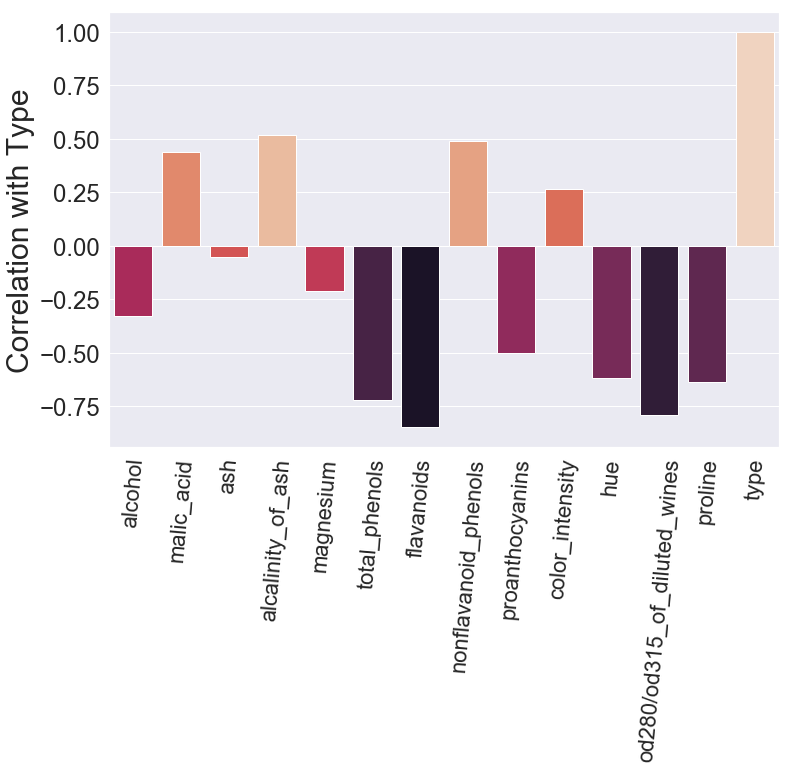

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = sbn.barplot(x = df.columns, 
                 y = target_corr,
                 hue = target_corr,
                 palette="rocket",
                 dodge = False)

plt.ylabel('Correlation with Type', 
           fontsize = 30)

plt.tick_params(labelsize = 24)
ax.set_xticklabels(df.columns.tolist(),
                  fontsize = 22,
                  rotation = 85)

ax.legend_.remove()

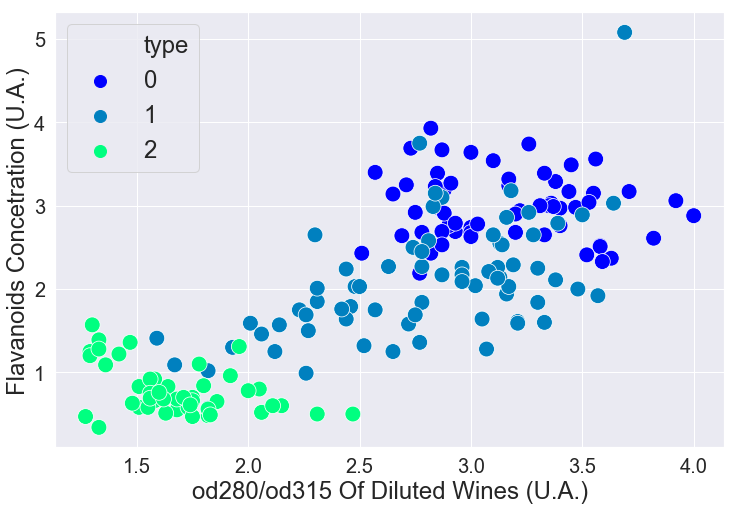

In [8]:
fig = plt.figure(figsize=(12, 8))

ax = sbn.scatterplot(x    = 'od280/od315_of_diluted_wines', 
                     y    = 'flavanoids', 
                     hue  = 'type', 
                     data = df,
                     s    = 250,
                     palette = 'winter'
)

plt.xlabel('od280/od315 Of Diluted Wines (U.A.)', fontsize=24)
plt.ylabel('Flavanoids Concetration (U.A.)'     , fontsize=24)
plt.tick_params(labelsize = 20)

plt.legend(loc="upper left", 
           markerscale = 2., 
           fontsize    = 24)

plt.show()

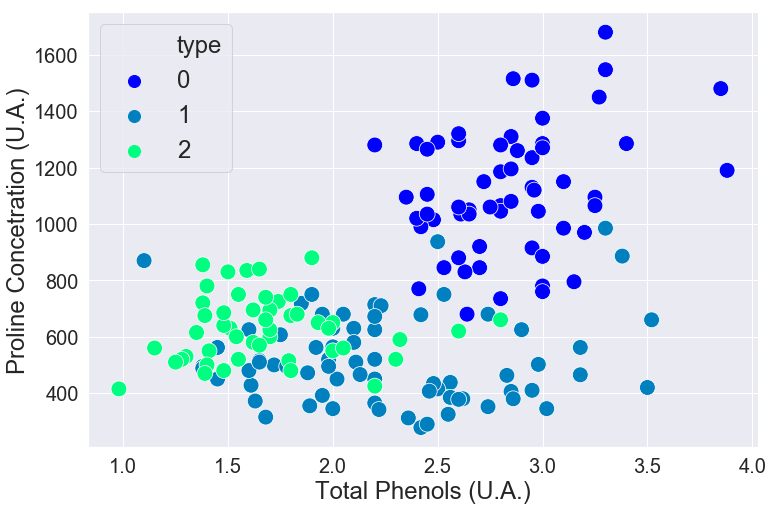

In [9]:
fig = plt.figure(figsize=(12, 8))

ax = sbn.scatterplot(x    = 'total_phenols', 
                     y    = 'proline', 
                     hue  = 'type', 
                     data = df,
                     s    = 250,
                     palette = 'winter'
)

plt.xlabel('Total Phenols (U.A.)'       , fontsize=24)
plt.ylabel('Proline Concetration (U.A.)', fontsize=24)
plt.tick_params(labelsize = 20)

plt.legend(loc="upper left", 
           markerscale = 2., 
           fontsize    = 24)

plt.show()

In [10]:
pca = PCA(n_components=3, random_state = 8)
ms  = MinMaxScaler()

x_pca  = pca.fit_transform(x)
x_norm = ms.fit_transform(x_pca)
df_pca = pd.DataFrame(np.c_[x_norm, y],
                       columns = ['first',
                                  'second',
                                  'third',
                                  'class'])\
             .astype({'first'  :float,
                      'second' :float, 
                      'class'  :int})

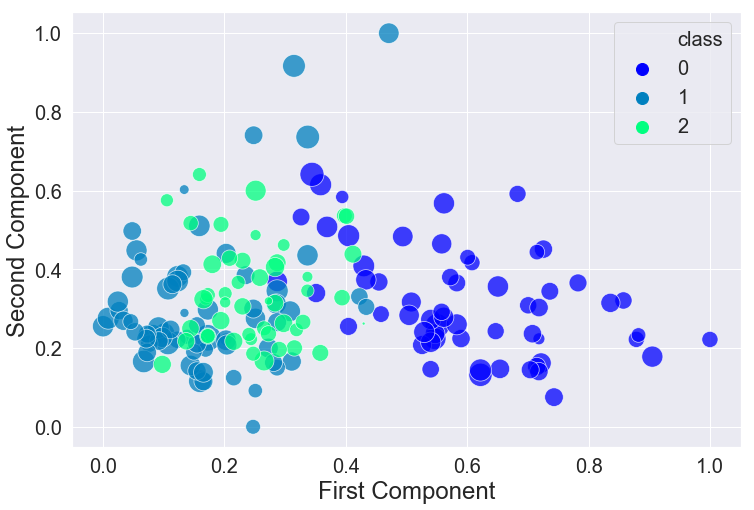

In [11]:
fig = plt.figure(figsize=(12, 8))

size = abs(700*df_pca['third'].values)

ax = sbn.scatterplot(x = 'first',
                     y = 'second',
                     s = size,
                     hue   = 'class',
                     data  = df_pca,
                     alpha = 0.75,
                     palette = 'winter')

plt.xlabel('First Component' , fontsize = 24)
plt.ylabel('Second Component', fontsize = 24)
plt.tick_params(labelsize = 20)

plt.legend(loc="upper right", 
           markerscale = 2., 
           fontsize    = 20)

plt.show()

In [47]:
tsne = TSNE(n_components = 2)

x_tsne = tsne.fit_transform(x)
x_norm = ms.fit_transform(x_tsne)
df_tsne = pd.DataFrame(np.c_[x_norm, y],
                       columns = ['first' ,
                                  'second',
                                  'class'])\
             .astype({'first'  :float,
                      'second' :float, 
                      'class'  :int})

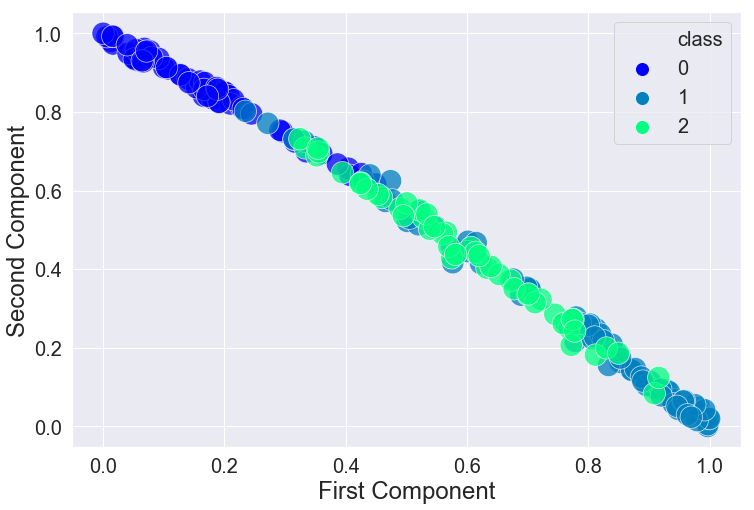

In [48]:
fig = plt.figure(figsize=(12, 8))

ax = sbn.scatterplot(x = 'first',
                     y = 'second',
                     s = 500,
                     hue   = 'class',
                     data  = df_tsne,
                     alpha = 0.75,
                     palette = 'winter')

plt.xlabel('First Component' , fontsize = 24)
plt.ylabel('Second Component', fontsize = 24)
plt.tick_params(labelsize = 20)

plt.legend(loc="upper right", 
           markerscale=2., 
           fontsize=20)

plt.show()

In [51]:
x_pca  = pca.fit_transform(x)
x_norm = ms.fit_transform(x_pca)
p = KMeans(n_clusters=3).fit_predict(x_norm)
df_pca = pd.DataFrame(np.c_[x_norm, p],
                       columns = ['first' ,
                                  'second',
                                  'third' ,
                                  'class'])\
             .astype({'first'  :float,
                      'second' :float,
                      'third'  :float,
                      'class'  :int})

x_tsne  = tsne.fit_transform(x)
x_norm = ms.fit_transform(x_tsne)
p = KMeans(n_clusters=3).fit_predict(x_norm)
df_tsne = pd.DataFrame(np.c_[x_norm, p],
                       columns = ['first' ,
                                  'second',
                                  'class'])\
             .astype({'first'  :float,
                      'second' :float,
                      'class'  :int})

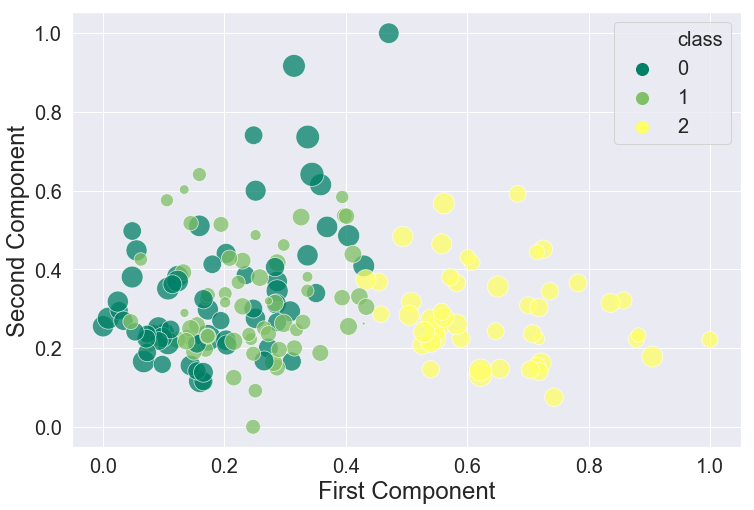

In [53]:
fig = plt.figure(figsize=(12, 8))

size = abs(700*df_pca['third'].values)

ax = sbn.scatterplot(x = 'first',
                     y = 'second',
                     s = size,
                     hue   = 'class',
                     data  = df_pca,
                     alpha = 0.75,
                     palette = 'summer')

plt.xlabel('First Component' , fontsize = 24)
plt.ylabel('Second Component', fontsize = 24)
plt.tick_params(labelsize = 20)

plt.legend(loc="upper right", 
           markerscale=2., 
           fontsize=20)

plt.show()

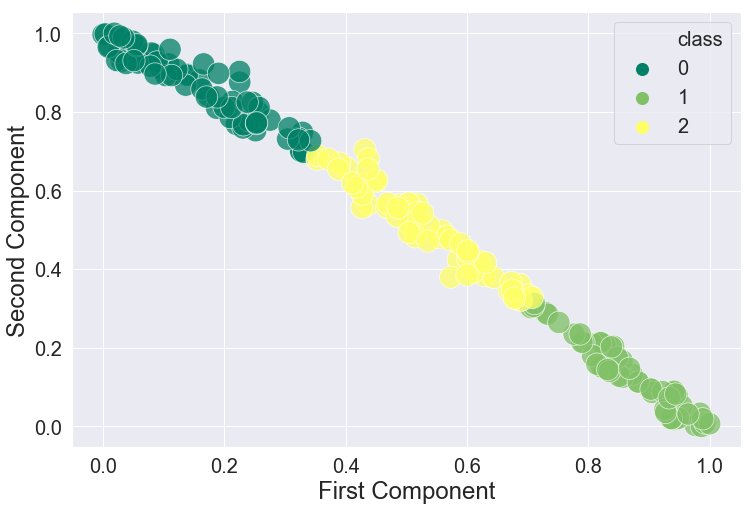

In [52]:
fig = plt.figure(figsize=(12, 8))

ax = sbn.scatterplot(x = 'first',
                     y = 'second',
                     s = 500,
                     hue   = 'class',
                     data  = df_tsne,
                     alpha = 0.75,
                     palette = 'summer')

plt.xlabel('First Component' , fontsize = 24)
plt.ylabel('Second Component', fontsize = 24)
plt.tick_params(labelsize = 20)

plt.legend(loc="upper right", 
           markerscale=2., 
           fontsize=20)

plt.show()